# 워드클라우드 (한글)

## #01. 형태소 분석의 이해

### 형태소

- 의미가 있는 최소의 단위(minimally meaningful unit)
- 문법적, 관계적인 뜻을 나타내는 단어 또는 단어의 부분
- 일정한 범위 안에서 쓰이는 낱말의 총체

문법적으로 더 이상 나눌 수 없는 언어 요소를 형태소라고 한다.

영어의 경우 각 단어로 나누면 되지만 한글의 경우 복잡한 처리 과정을 거쳐야 하기 때문에 별도의 라이브러리를 적용해야 한다. (konlpy, mecab 등)

### 형태소 분석 예시

#### 형태소 사전에 수록된 어휘를 기준으로 분석

```plain
사랑하다 = 사랑 + 하 + 다, 사랑하 + 다
알뜰하다 = 알뜰 + 하 + 다, 알뜰하 + 다
```

## #02. KoNLPy(OKT)를 사용한 형태소 분석

KoNLPy는 한국어 정보처리를 위한 파이썬 패키지

자연어처리(NLP)에서 형태소를 분리(형태소 단위 토크나이징)하는 데이터 전처리가 필요한데 이 때 한국어 데이터 전처리를 할 때 많이 사용하는 패키지

JAVA를 기반으로 만들어져 있어서 패키지 설치를 위해서는 JAVA 개발 환경이 구성되어 있어야 한다.

### 현재 컴퓨터의 java 환경 구성여부 확인

```shell
$ javac --version
```

설치가 필요한 경우 아래와 같이 에러 메시지가 표시된다.

```plain
'javac'은(는) 내부 또는 외부 명령, 실행할 수 있는 프로그램, 또는
배치 파일이 아닙니다.
```

### OpenJDK 다운로드

권장 버전은 `19`

[https://jdk.java.net/19/](https://jdk.java.net/19/) 페이지에서 자신의 버전에 맞는 파일을 내려 받는다.

다운로드 받은 파일을 적절한 위치에 압축 해제한다.

#### 예

```
C:\jdk-19.0.2
```

### 환경변수 설정

#### 환경변수 입력 화면 열기

1. 폴더창 좌측 트리에서 `내 PC` 마우스 우클릭 하여 `속성` 메뉴 선택
2. `설정`화면이 나타나면 오른쪽에서 `고급 시스템 설정` 클릭
3. 나타난 화면 하단의 `환경 변수` 버튼 클릭

#### `JAVA_HOME` 변수 추가

1. `환경 변수`화면 아래쪽의 `시스템 변수`영역에서 `새로 만들기` 버튼 클릭
2. 변수 이름에 `JAVA_HOME`
3. 변수 값에 JDK의 경로 입력
    - 예: `C:\jdk-19.0.2`
4. `확인`을 눌러 입력창 닫기

#### `Path` 변수 추가

1. `환경 변수`화면 아래쪽의 `시스템 변수`영역에서 `Path` 항목을 찾아 선택하고 `편집`버튼 클릭
2. 맨 아래 빈 행을 더블클릭 하여 입력 상태로 만들고 JDK 설치 폴더 내의 `bin` 디렉토리까지의 경로를 입력
    - 예: `C:\jdk-19.0.2\bin`
3. `확인`을 눌러 모든 창 닫기

명령 프롬프트, 폴더창, VSCode 등 모든 프로그램을 닫은 후 명령 프롬프트에서 `javac --version` 명령으로 설정이 잘 되었는지 확인

### 형태소 분석 설치

`konlpy` 패키지 설치가 필요하다.

### 형태소 분석 테스트

#### 패키지 참조

java 설치 확인

In [26]:
from konlpy.tag import Okt

형태소 분석 객체 생성

In [27]:
nlp=Okt()

In [28]:
sample = "‘갤럭시 성공 신화’의 주역이자 대표이사를 지낸\
      고동진 삼성전자 고문이 11일 펴낸 ‘일이란 무엇인가’(민음사)에 담긴 내용이다.\
          308페이지짜리 책에 그가 평사원에서 시작해 사장에 오르고\
              거대 기업을 이끌면서 겪었던 경험과 노하우, 조언을 담았다.\
                  ‘적을 편으로 만드는 두 가지 방법’ ‘판단력이란 밀고 나가는 힘이다’\
                      ‘불평 말고 (문제 해결이 가능한) 컴플레인을 하라'와 같은 식이다.\
                          그는 “38년간 조직 생활에서 고민하고 실천했던\
                              경험과 나름의 노하우를 나누고자 쓴 책”이라고 했다."

# 명사만 추출
nouns = nlp.nouns(sample)
print(nouns)

['갤럭시', '성공', '신화', '의', '주역', '이자', '대표이사', '고동진', '삼성', '전자', '고문', '일', '무엇', '민음사', '내용', '페이지', '책', '그', '평', '사원', '시작', '사장', '거대', '기업', '경험', '노하우', '조언', '적', '편', '두', '가지', '방법', '판단력', '밀고', '힘', '불평', '문제', '해결', '컴', '플레인', '하라', '식이', '그', '조직', '생활', '고민', '실천', '경험', '나름', '노하우', '책']


In [29]:
sample2 = "삼성전자 전 CEO들의 책엔 어디서도 듣기 어려운 ‘삼성맨’의 솔직한 자기 고백과 통찰이 담겨 있다.\
      성균관대를 나와 삼성 CEO가 된 고 고문은\
          “쟁쟁한 명문대 출신에 유학파, 박사가 가득한 곳에서 학부 졸업생으로 입사한 내가\
              할 수 있는 건 절실함을 갖고, 성실히 일하는 것뿐이었다”며 “학벌도 떨어지고,\
                  능력도 부족하고 가진 것이 없어 무엇부터, 어떻게 시작해야 할지 모르겠다면 시간,\
                      정확히는 시간 관리부터 출발하라”고 했다.\
                          퇴근 전에는 늘 다음 날 할 일을 시간 단위로 정리하는 ‘투 두 리스트(to do list)’를\
                              만들어보라는 조언도 했다."

# 명사만 추출
nouns2 = nlp.nouns(sample2)
print(nouns2)

['삼성', '전자', '전', '책', '어디', '서도', '듣기', '삼성맨', '의', '자기', '고백', '통찰', '성균관대', '삼성', '고', '고문', '쟁쟁', '명문', '출신', '유학', '파', '박사', '곳', '학부', '졸업생', '입사', '내', '수', '건', '절실', '함', '일', '것', '며', '학벌', '능력', '것', '무엇', '시작', '시간', '시간', '관리', '출발', '하라', '고', '퇴근', '전', '늘', '다음', '날', '일', '시간', '단위', '정리', '투', '두', '리스트', '를', '보라', '조언']


#### 사전 구축 하기

##### konlpy 설치 경로 확인

In [30]:
import konlpy
konlpy.data.path

['C:\\Users\\jehyu/konlpy_data',
 'C:\\konlpy_data',
 'D:\\konlpy_data',
 'E:\\konlpy_data',
 'c:\\Python311\\konlpy_data',
 'c:\\Python311\\lib\\konlpy_data',
 'C:\\Users\\jehyu\\AppData\\Roaming\\konlpy_data',
 'C:\\Python311\\Lib\\site-packages\\konlpy/data']

출력되는 마지막 경로의 상위 폴더가 `konlpy`의 설치 위치로 확인됨

> 컴퓨터마다 다를 수 있음

`konlpy`의 설치 위치 하위의 `java` 라는 이름의 폴더에서 `open-korean-text-2.1.0.jar` 파일의 압축을 해제

압축을 해제한 폴더 안에서 `names.txt` 파일을 찾는다.

```
.\open-korean-text-2.1.0\org\openkoreantext\processor\util\noun
```

`txt` 파일이 위치하는 폴더 안에 임의의 텍스트 파일을 영문이름, 공백금지, UTF-8 형태로 생성하고 그 안에 새로운 단어들을 줄바꿈으로 구분하여 나열한다.

`open-korean-text-2.1.0` 폴더 위치에서 명령 프롬프트를 열고 아래의 명령으로 jar 압축을 수행

```java
$ jar cvf open-korean-text-2.1.0.jar .
```

> 마지막에 현재 폴더를 의미하는 `.` 주의

생성된 jar 파일을 기존의 파일과 교체한다. (VSCode 종료 후 파일 교체 해야 함)

## #03. 한글 워드 클라우드

### 패키지 참조

`kolnpy`는 앞에서 이미 참조했으므로 생략

In [31]:
from IPython.display import Image, display
from konlpy.tag import Okt
from wordcloud import WordCloud
import sys
import os

# 파이썬 내장 클래스 --> 설치 불필요
from collections import Counter

### 형태소 분석 객체 생성

In [32]:
# 형태소 분석 클래스의 객체 생성
nlp = Okt()

In [33]:
sample = "개봉했을때부터 지금까지 마음이답답하거나 힘들때 이영화 보고있어요 그때마다 심적인 위로를 받을수있는영화같아요 장면 하나하나가 너무예쁘고 마음에 남아서 진한 여운까지 주는영화 감사합니다. 알잘딱깔센"

# 명사들만 추출 -> 리스트형식으로 반환
nouns = nlp.nouns(sample)
print(nouns)

['개봉', '때', '지금', '마음', '때', '이영화', '그때', '심', '위로', '영화', '장면', '하나', '하나', '마음', '남아', '여운', '영화']


### 사전 구축 하기

konlpy의 설치 경로 확인

In [34]:
import konlpy
konlpy.data.path

['C:\\Users\\jehyu/konlpy_data',
 'C:\\konlpy_data',
 'D:\\konlpy_data',
 'E:\\konlpy_data',
 'c:\\Python311\\konlpy_data',
 'c:\\Python311\\lib\\konlpy_data',
 'C:\\Users\\jehyu\\AppData\\Roaming\\konlpy_data',
 'C:\\Python311\\Lib\\site-packages\\konlpy/data']

### 분석할 데이터 가져오기

In [35]:
with open("wordcloud/대한민국헌법.txt", 'r', encoding="utf-8") as f:
    text = f.read()
    #print(text)

### 데이터에 대한 형태소 분석

In [36]:
# 형태소 분석 클래스의 객체 생성
nlp = Okt()

# 명사들만 추출 -> 리스트형식으로 반환
nouns = nlp.nouns(text)
#print(nouns)

### 불용어 목록 가져오기

In [37]:
with open('wordcloud/stopwords-ko.txt', 'r', encoding='utf-8') as f:
    stopwords = f.readlines()
    
    for i, v in enumerate(stopwords):
        stopwords[i] = v.strip()    #strip을 사용해 공백 제거

    # print(stopwords)

### 추출된 명사에서 불용어를 제거함

In [38]:
data_set = []

for v in nouns:
    if v not in stopwords:
        data_set.append(v)

#print(data_set)

### helper.py에 모듈화 한 기능 테스트

In [39]:
# 직접 구현한 모듈 참조
# 소스파일의 위치에 따라 `os.path.dirname` 사용 횟수 조절 필요
sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
from helper import clearStopwords

In [40]:
data_set = clearStopwords(nouns)
#data_set

### 리스트로부터 빈도수 측정

In [41]:
count = Counter(nouns)
# count

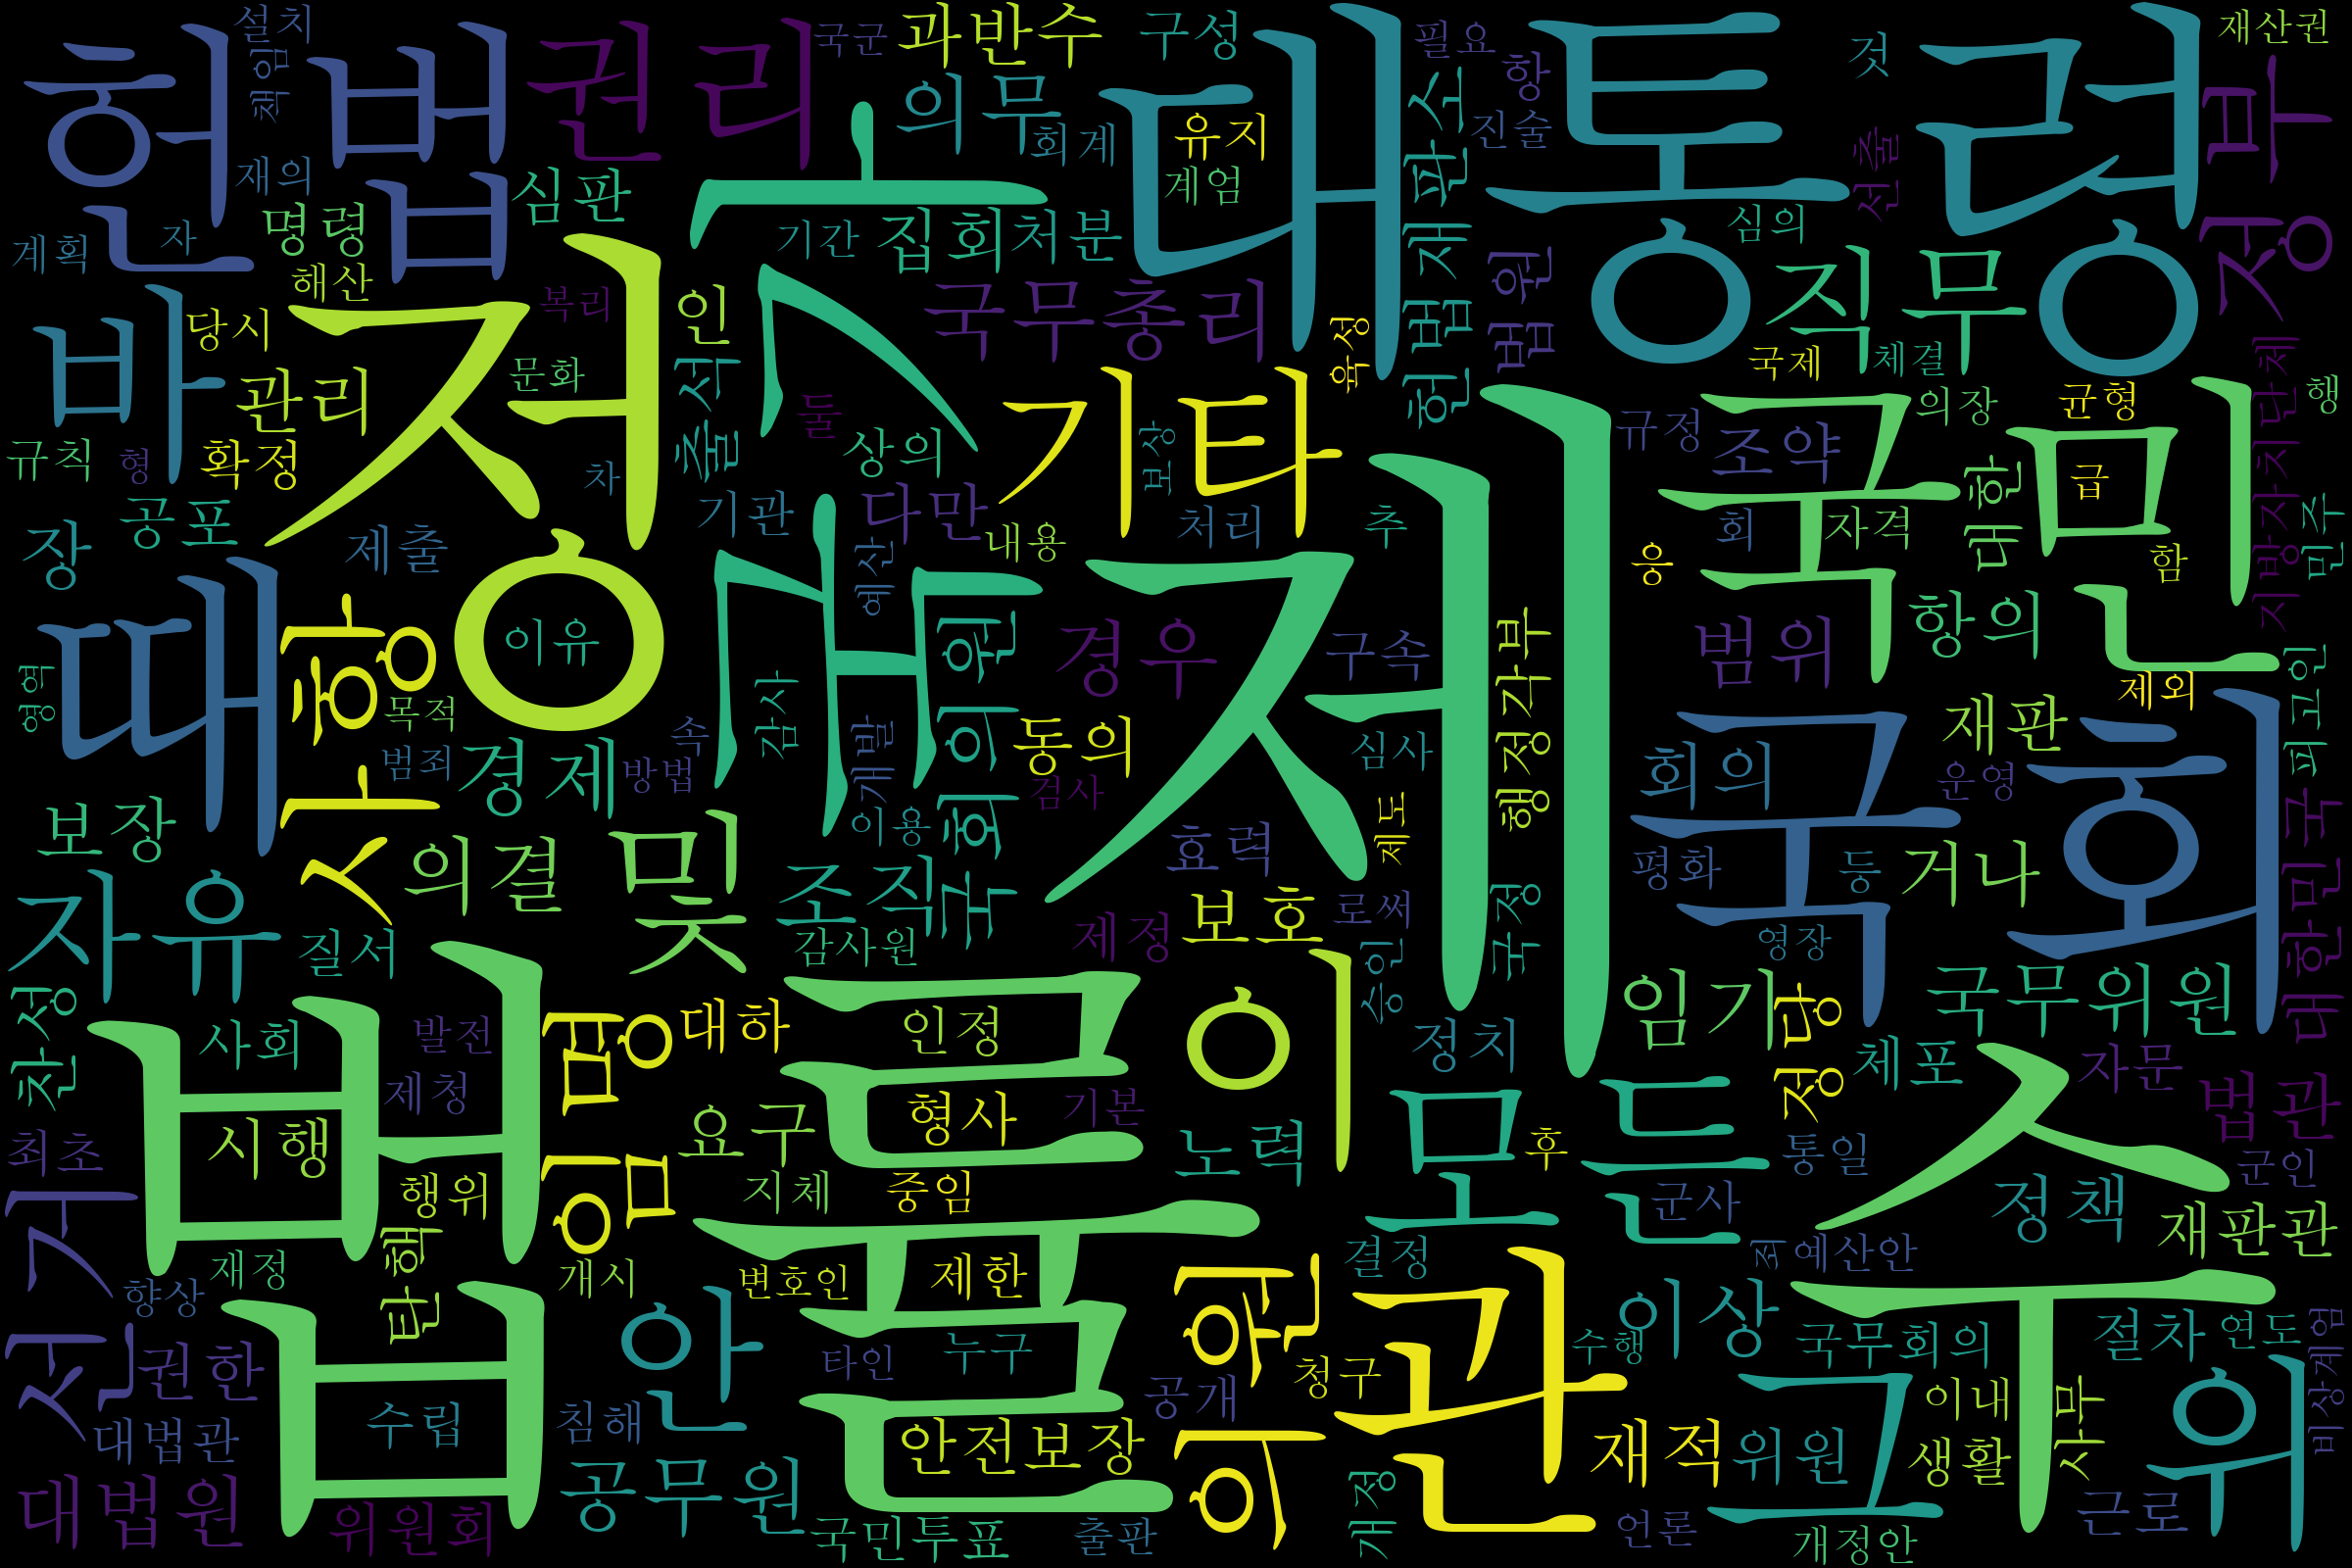

In [42]:
# 워드 클라우드 객체 생성 -> 한글은 폰트파일의 경로를 지정해야 함
wc = WordCloud(font_path="./wordcloud/batang.ttc", width=1200, height=800, scale=2.0)

# 직접 생성한 빈도수를 이용해서 워드 클라우드를 그린다.
wc = wc.generate_from_frequencies(count)
wc.to_file("대한민국헌법-주요단어.png")
display(Image(filename='대한민국헌법-주요단어.png'))